In [73]:
import netCDF4 as nc
import os
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import datetime
from scipy import interpolate
import cartopy.crs as ccrs
import cartopy
import cmocean

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

In [32]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

## Open txt file position data

In [27]:
SB_ADCP = pd.read_excel("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_ADCP_ARCTOS.xlsx", header=0)
SB_Iskant = pd.read_excel("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_Iskant_ARCTOS.xlsx", header=0)

In [116]:
SB_ADCP

,Time,Lat,Long,TTFF,Warning,Count,Leak,Commands,I,V,...,T2,T3,WPReached,WithinRadius,SAP,SAM,SAS,BigLeak,Column1,_1
0,2021-05-16 13:40:00,76.76805,29.92095,11,0,26,0,0,0.005,13.9,...,2,2,0,0,7,2,28,0,NaN,NaN
1,2021-05-16 13:45:00,76.76634,29.92203,11,0,27,0,0,0.005,14.0,...,2,2,0,0,5,0,22,0,NaN,NaN
2,2021-05-16 13:50:00,76.76460,29.92140,12,0,28,0,0,0.005,14.0,...,2,2,0,0,0,0,41,0,NaN,NaN
3,2021-05-16 13:55:00,76.76331,29.92647,12,0,29,0,0,0.005,13.9,...,2,2,0,0,4,0,34,0,NaN,NaN
4,2021-05-16 14:00:00,76.76187,29.93046,11,0,0,0,0,0.005,13.9,...,2,2,0,0,6,0,32,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2021-05-21 07:00:00,76.09320,30.14397,11,0,8,0,0,0.005,14.0,...,1,0,0,1,96,5,0,0,NaN,NaN
804,2021-05-21 07:15:00,76.09353,30.16584,12,0,9,0,0,0.005,13.9,...,0,1,0,1,8,1,92,0,NaN,NaN
805,2021-05-21 07:30:00,76.09275,30.15894,12,0,10,0,0,0.005,13.9,...,0,0,0,1,90,7,4,0,NaN,NaN
806,2021-05-21 07:45:00,76.09176,30.15138,13,0,11,0,0,0.005,14.0,...,0,0,0,1,85,7,9,0,NaN,NaN


# Load bathymetry

In [38]:
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [125]:
lat_lim = [75.5, 77]
lon_lim = [29, 31]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1


In [126]:
BS_topo.variables['elevation'][:].data[1,1]

-2876

# Make map

Text(0.5, 1.0, 'Sailbuoy tracks: May 16 13:30 - May 21 8:00')

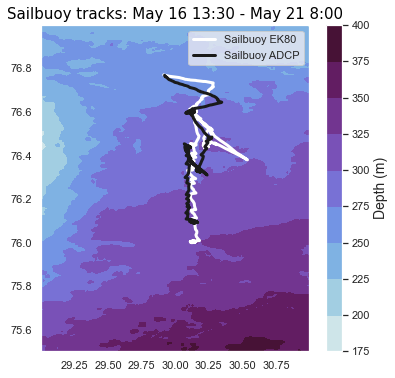

In [132]:
plt.figure(figsize=(6,6))
# Plot
im = plt.contourf(lons,lats,bathy, cmap=cmocean.cm.dense)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

plt.plot(SB_Iskant['Long'],SB_Iskant['Lat'], 'w', linewidth=3, label='Sailbuoy EK80')
plt.plot(SB_ADCP['Long'],SB_ADCP['Lat'], 'k', linewidth=3,label='Sailbuoy ADCP')

plt.legend()
plt.title('Sailbuoy tracks: May 16 13:30 - May 21 8:00', title_font)